<h1><center>Deep Learning</center></h1>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenLayer = 3, outputSize = 1,Activation_func='sigmoid' ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenLayer
        self.Activation_func=Activation_func
        
            
            
        
        #weights
        self.W1 = np.random.randn(self.hiddenLayer, self.inputSize+1) # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.randn(self.outputSize, self.hiddenLayer+1) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias       

    def execute_Activation_func(self,func_name,val,is_derivative=0):
        if func_name=='sigmoid' and is_derivative==0:
            return self.sigmoid(val)
        if func_name=='sigmoid' and is_derivative==1:
            return self.sigmoid_derivative(val)
        #-----------------Tanh-----------------------------
        if func_name=='tanh' and is_derivative==0:
            return self.tanh(val)
        if func_name=='tanh' and is_derivative==1:
            return self.tanh_derivative(val)
        #-----------------relu-----------------------------
        if func_name=='relu' and is_derivative==0:
            return self.sigmoid(val)
        if func_name=='relu' and is_derivative==1:
            return self.sigmoid_derivative(val)
 
    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. whatever function was passed in initialization)    
        Z1=np.dot(self.W1,X)
        A1=self.execute_Activation_func(self.Activation_func,Z1,0)
        A1_bias=np.ones((A1.shape[0]+1,A1.shape[1]))
        A1_bias[1:,:]=A1[:,:]
        #print(A1_bias.shape)
        Z2=np.dot(self.W2,A1_bias)
        A2=self.sigmoid(Z2)
        return A2,A1,A1_bias
        
     # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s)) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return np.exp(-s)/((1+np.exp(-s))**2) # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return 1.0 - np.tanh(s)**2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        return max(0,s) # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        return 1*(s > 0) # apply derivative of relu on s and return it's value

    def backwardpropagate(self,X, Y, y_pred, lr,A1,A1_bias):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of that applied activation function to the error
        # adjust set of weights
        dZ2=y_pred-Y
        dW2=np.dot(dZ2,A1_bias.T)
        #print(A1_bias.shape,'             ')
        dZ1= np.dot(self.W2[:,1:].T,dZ2) * self.execute_Activation_func(self.Activation_func,A1,1)
        dW1 =dZ1.dot(X.T)
        self.W2 = self.W2 - (lr * dW2)
        self.W1 = self.W1 - (lr * dW1)
        
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return -(Y * np.log(Y_pred)+(1-Y) * np.log(1-Y_pred)) #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = 0, validationY = 0):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
        # plot error of the model if plot_err is true
        losslist = list()
        for i in range (epochs):
            loss_nest=list()
            for i in range(trainX.shape[1]):
                trainX_col= trainX[:,i,None]
                trainY_label=trainY[0][i]
                Y_pred,A1,A1_bias = self.feedforward(trainX_col)
                loss_nest.append(self.crossentropy(trainY_label,Y_pred))
                #print(trainX.shape,'  ' ,trainY.shape,'  ',Y_pred.shape )
                self.backwardpropagate(trainX_col ,trainY_label,Y_pred,learningRate,A1,A1_bias)
                #print(self.W1)
            losslist.append(np.mean(loss_nest))
           # print(self.accuracy(validationX,validationY))
        plt.plot(losslist)
        plt.show()


    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        Y_pred,A1,A1_bias = self.predict(testX)
        
        pred_y = Y_pred.reshape((Y_pred.shape[1]))
        #print(pred_y)
        pred_y[pred_y>=0.5]=1
        pred_y[pred_y<0.5]=0
        testY = testY.reshape((testY.shape[1]))
        return accuracy_score(testY, pred_y)*100    
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        pickle.dump(self, open(name, 'wb'))

        
    def loadModel(self,name):
         return pickle.load(open(name, 'rb'))
        # load your trained model, load exactly how you stored it.

    


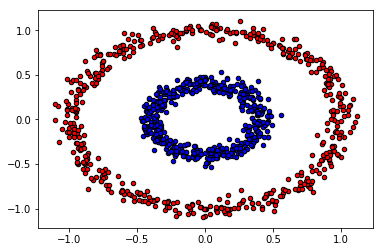

In [3]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05,random_state=1)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [4]:
data_new=np.ones((3,1000))

In [5]:
#data=data.reshape((2,1000))
label=label.reshape((1,1000))

In [6]:
data_new[1:,:]=data.T

In [7]:
data=data_new

In [8]:
print(data[:,:1])

[[ 1.        ]
 [ 0.46393874]
 [-0.02260865]]


In [9]:
data[:,:2]

array([[ 1.        ,  1.        ],
       [ 0.46393874, -0.27151591],
       [-0.02260865, -0.37722337]])

In [10]:
asd = Neural_Network(2,4,1,Activation_func='relu')

In [11]:
# asd.W1

In [12]:

#Note: shuffle this dataset before dividing it into three parts

# Distribute this data into three parts i.e. training, validation and testing
trainX=data[:,:round(data.shape[1]*0.7)]
trainY=label[:,:round(label.shape[1]*0.7)]


#validX = ? # validation data point
#validY = ?# validation lables

testX=data[:,round(data.shape[1]*0.7):]
testY=label[:,round(label.shape[1]*0.7):]


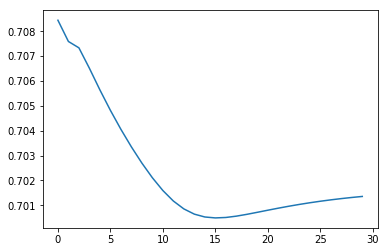

In [403]:
model = Neural_Network(2,4,1,Activation_func='relu')
# try different combinations of epochs and learning rate
model.train(trainX, trainY,validationX=testX,validationY=testY, epochs = 30, learningRate = 0.1 )

In [393]:
model.accuracy(testX,testY)

100.0

In [397]:
#save the best model which you have trained, 
model.saveModel('bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [399]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodel.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




100.0